
<====Model====>

RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=1)

<====Grid Search====>

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished



<====Best Model====>

Best score:  0.9761904761904762
Best parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Test accuracy: 99.05%

Confusion Matrix:
[[34  0  0  0  1  0  0]
 [ 0 33  0  0  0  0  0]
 [ 0  0 25  0  0  0  0]
 [ 0  0  0 27  0  0  0]
 [ 1  0  0  0 31  0  0]
 [ 0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0 27]]


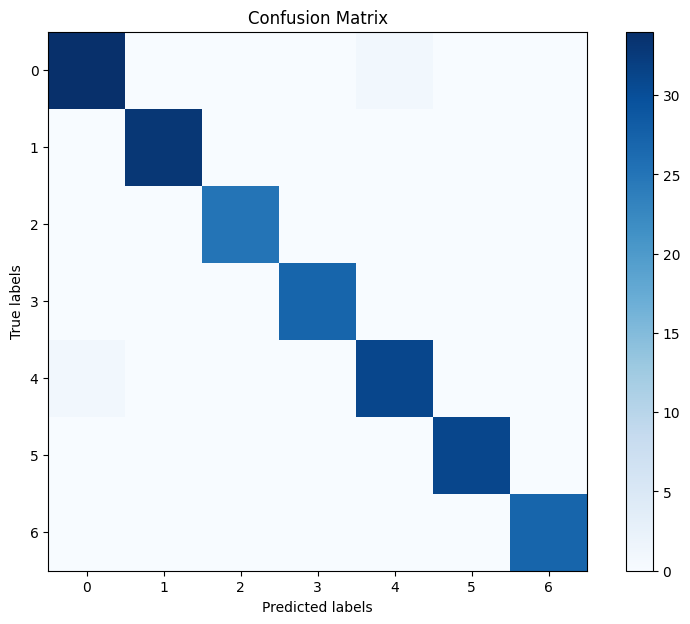

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 

# Configure file paths
DATA = 'model/data_600.npy'
LABEL = 'model/label_600.npy'

# Load data and labels
data = np.load(DATA)
label = np.load(LABEL)

# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.20, random_state=42)

# Initialize a random forest classifier
print("\n<====Model====>\n")
clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=1)
print(clf)

print("\n<====Grid Search====>\n")

# Enumerate search parameters
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30, 50, 70, 100, 150]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

# Set up parameter dictionary
hyperF = {
    'n_estimators': n_estimators, 
    'max_depth': max_depth,  
    'min_samples_split': min_samples_split, 
    'min_samples_leaf': min_samples_leaf
}

# Perform grid search
gridF = GridSearchCV(clf, hyperF, cv=3, verbose=1, n_jobs=-1)
bestF = gridF.fit(x_train, y_train)

print("\n<====Best Model====>\n")

# Print the best parameters and score
print("Best score: ", bestF.best_score_)
print("Best parameters: ", bestF.best_params_)

# Predict using the best model
y_pred = bestF.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Optionally, you can plot the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(np.unique(label))), np.unique(label))
plt.yticks(np.arange(len(np.unique(label))), np.unique(label))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
